In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
bandeira = cv2.imread('bandeira_brasil.jpeg', cv2.COLOR_BGR2RGB)
bandeira.shape

(343, 491, 3)

In [3]:
def showImage(img):
    cv2.imshow('bandeira', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
bandeira_r, bandeira_g, bandeira_b = cv2.split(bandeira)

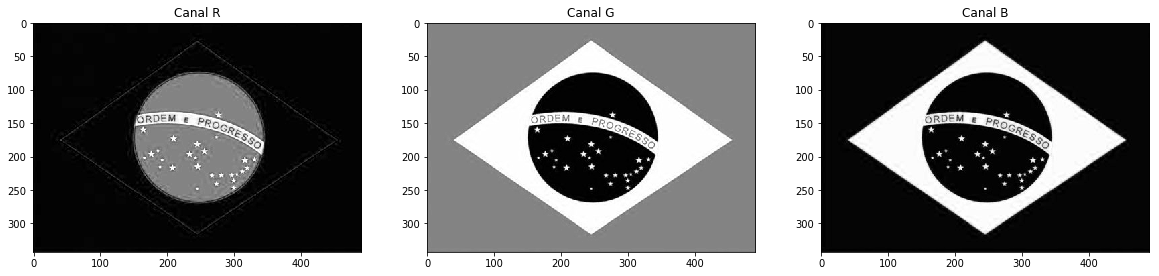

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(20,15))

ax[0].imshow(bandeira_r, cmap='gray')
ax[0].set_title('Canal R')

ax[1].imshow(bandeira_g, cmap='gray')
ax[1].set_title('Canal G')

ax[2].imshow(bandeira_b, cmap='gray')
ax[2].set_title('Canal B')

plt.show()

### Vermelho e verde combinados formam amarelo

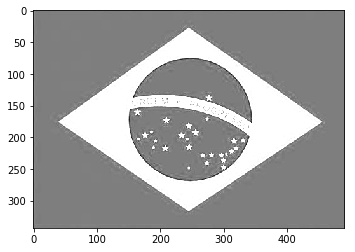

In [6]:
r_and_g = cv2.add(bandeira_r, bandeira_g)
plt.imshow(r_and_g, cmap='gray');

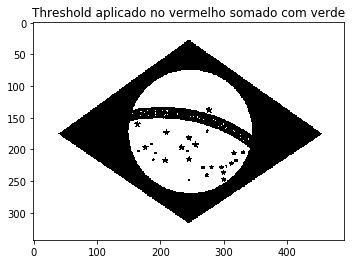

In [7]:
_, th_r_g = cv2.threshold(r_and_g, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(th_r_g, cmap='gray')
plt.title('Threshold aplicado no vermelho somado com verde');

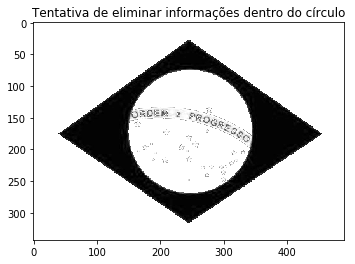

In [8]:
sum_th_r = cv2.add(th_r_g, bandeira_r)
plt.imshow(sum_th_r, cmap='gray')
plt.title('Tentativa de eliminar informações dentro do círculo');

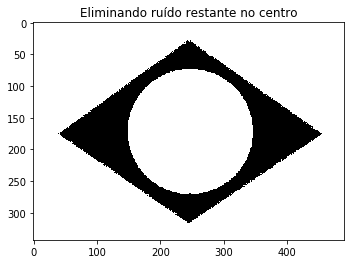

In [9]:
_, final_mask_fg = cv2.threshold(sum_th_r, 50, 255, cv2.THRESH_BINARY)
plt.imshow(final_mask_fg, cmap='gray')
plt.title('Eliminando ruído restante no centro');

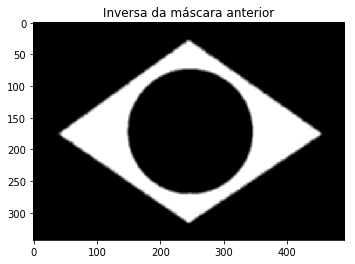

In [10]:
final_mask_bg = cv2.blur(cv2.bitwise_not(final_mask_fg), (5,5))
plt.imshow(final_mask_bg, cmap='gray')
plt.title('Inversa da máscara anterior');

In [11]:
np.unique(final_mask_bg)

array([  0,  10,  20,  31,  41,  51,  61,  71,  82,  92, 102, 112, 122,
       133, 143, 153, 163, 173, 184, 194, 204, 214, 224, 235, 245, 255],
      dtype=uint8)

In [12]:
final_mask_bg_3 = cv2.cvtColor(final_mask_bg, cv2.COLOR_GRAY2RGB)

In [13]:
def nothing(x):
    pass

mask_rgb = np.zeros(bandeira.shape, np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R','image',255,255, nothing)
cv2.createTrackbar('G','image',255,255, nothing)
cv2.createTrackbar('B','image',0,255, nothing)

while(1):
    cv2.imshow('image', cv2.add(cv2.subtract(bandeira, final_mask_bg_3), cv2.bitwise_and(mask_rgb, final_mask_bg_3)))
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')

    mask_rgb[:] = [b, g, r]

cv2.destroyAllWindows()